In [1]:
import pyspark as ps
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark import SQLContext

spark = ps.sql.SparkSession.builder.master('local') \
    .appName('Homework-4').getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)
print("Imported packages")

Imported packages


In [2]:
path = 'EPL_20_21.csv'
df = sqlContext.read.csv(path, header = True, quote = '"', sep = ",", inferSchema = True)
df.show(5)

+-------------+-------+-----------+--------+---+-------+------+----+-----+-------+----------------+---------------------+-------------+-----------------+----+----+------------+---------+
|         Name|   Club|Nationality|Position|Age|Matches|Starts|Mins|Goals|Assists|Passes_Attempted|Perc_Passes_Completed|Penalty_Goals|Penalty_Attempted|  xG|  xA|Yellow_Cards|Red_Cards|
+-------------+-------+-----------+--------+---+-------+------+----+-----+-------+----------------+---------------------+-------------+-----------------+----+----+------------+---------+
|  Mason Mount|Chelsea|        ENG|   MF,FW| 21|     36|    32|2890|    6|      5|            1881|                 82.3|            1|                1|0.21|0.24|           2|        0|
|Edouard Mendy|Chelsea|        SEN|      GK| 28|     31|    31|2745|    0|      0|            1007|                 84.6|            0|                0| 0.0| 0.0|           2|        0|
|  Timo Werner|Chelsea|        GER|      FW| 24|     35|    29|26

In [3]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Matches: integer (nullable = true)
 |-- Starts: integer (nullable = true)
 |-- Mins: integer (nullable = true)
 |-- Goals: integer (nullable = true)
 |-- Assists: integer (nullable = true)
 |-- Passes_Attempted: integer (nullable = true)
 |-- Perc_Passes_Completed: double (nullable = true)
 |-- Penalty_Goals: integer (nullable = true)
 |-- Penalty_Attempted: integer (nullable = true)
 |-- xG: double (nullable = true)
 |-- xA: double (nullable = true)
 |-- Yellow_Cards: integer (nullable = true)
 |-- Red_Cards: integer (nullable = true)



In [4]:
df.count()

532

In [5]:
df.select('Club').distinct().count()

20

In [6]:
df.select('Club').distinct().show()

+--------------------+
|                Club|
+--------------------+
|            Brighton|
|   Manchester United|
|             Arsenal|
|    Sheffield United|
|    Newcastle United|
|        Leeds United|
|      Crystal Palace|
|             Burnley|
|         Aston Villa|
|     Manchester City|
|              Fulham|
|         Southampton|
|      Leicester City|
|   Tottenham Hotspur|
|Wolverhampton Wan...|
|        Liverpool FC|
|West Bromwich Albion|
|             Chelsea|
|     West Ham United|
|             Everton|
+--------------------+



In [7]:
df_team = df[df['Club'] == 'Crystal Palace']
df_team.count()

24

In [8]:
def print_quantiles(df, feature):
    min_value = df_team.select(feature).rdd.min()[0]
    max_value = df_team.select(feature).rdd.max()[0]
    quantiles = df_team.approxQuantile(feature, [0.25, 0.5, 0.75], 0)
    
    print('min {}: {}'.format(feature, min_value))
    print('max {}: {}'.format(feature, max_value))
    print('median {}: {}'.format(feature, quantiles[1]))
    print('lower quartile {}: {}'.format(feature, quantiles[0]))
    print('upper quartile {}: {}'.format(feature, quantiles[2]))

In [9]:
print_quantiles(df_team, 'Starts')

min Starts: 0
max Starts: 37
median Starts: 19.0
lower quartile Starts: 7.0
upper quartile Starts: 25.0


In [10]:
print_quantiles(df_team, 'Perc_Passes_Completed')

min Perc_Passes_Completed: 28.6
max Perc_Passes_Completed: 100.0
median Perc_Passes_Completed: 77.2
lower quartile Perc_Passes_Completed: 70.2
upper quartile Perc_Passes_Completed: 81.1


In [11]:
print_quantiles(df_team, 'Passes_Attempted')

min Passes_Attempted: 2
max Passes_Attempted: 1269
median Passes_Attempted: 628.0
lower quartile Passes_Attempted: 168.0
upper quartile Passes_Attempted: 864.0


In [12]:
print_quantiles(df_team, 'Goals')

min Goals: 0
max Goals: 11
median Goals: 1.0
lower quartile Goals: 0.0
upper quartile Goals: 1.0


In [13]:
print_quantiles(df_team, 'Assists')

min Assists: 0
max Assists: 6
median Assists: 1.0
lower quartile Assists: 0.0
upper quartile Assists: 1.0


In [14]:
print_quantiles(df_team, 'Mins')

min Mins: 2
max Mins: 3330
median Mins: 1710.0
lower quartile Mins: 728.0
upper quartile Mins: 2256.0


In [15]:
df_team = df_team.toPandas()

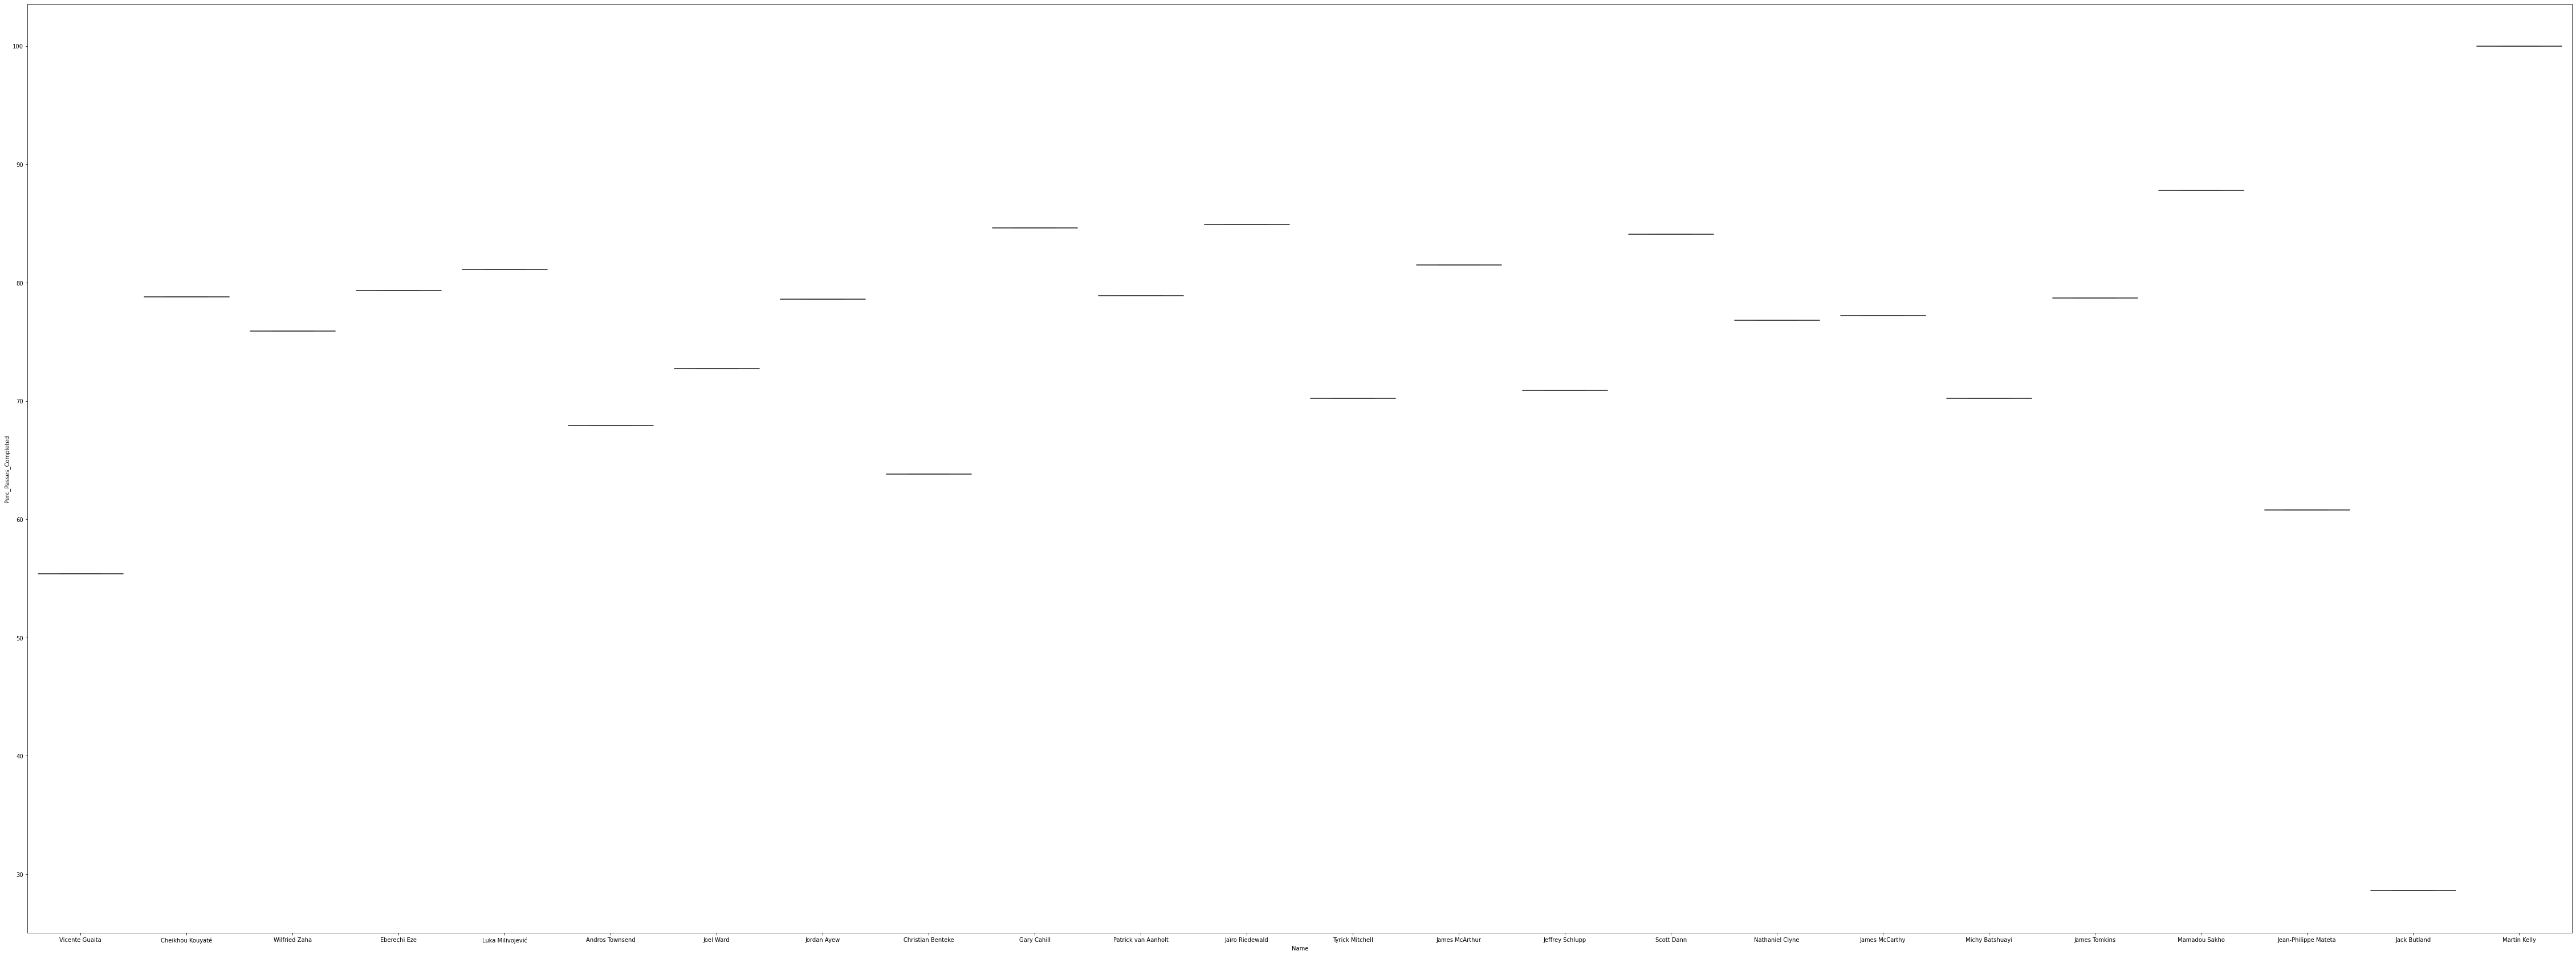

In [16]:
plt.figure(figsize = (80, 30))
sns.boxplot(x = df_team['Name'], y = df_team['Perc_Passes_Completed'])

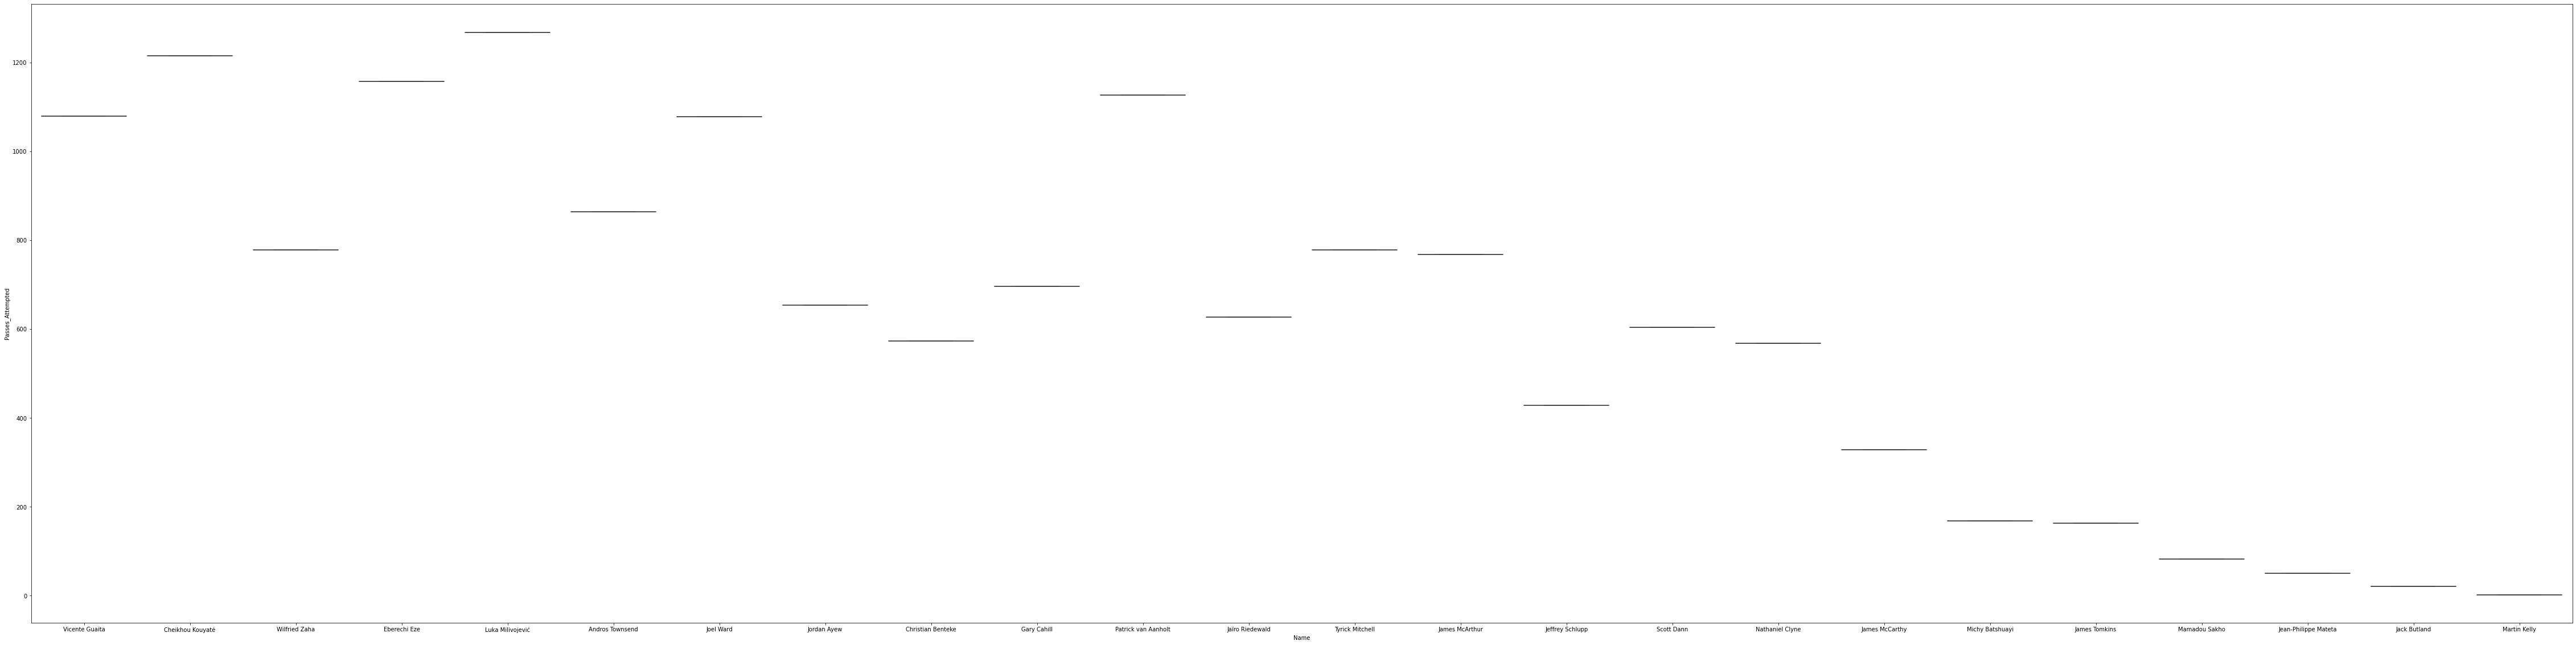

In [17]:
plt.figure(figsize = (80, 20))
sns.boxplot(x = df_team['Name'], y = df_team['Passes_Attempted'])

In [ ]:
plt.figure(figsize = (80, 8))
sns.boxplot(x = df_team['Name'], y = df_team['Goals'])